### CLASS CS-6635,  Assignment - 1  
### Name : Trupti Mohanty


### Part 1: Generate your own data and visualize it [30 pts]

In [490]:
## Import all required libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
from pandas.plotting import parallel_coordinates
np.random.seed(21)
import plotly.graph_objs as go
from matplotlib.colors import ListedColormap

#### Create an array of 100 random numbers uniformly distributed between 0 and 1. Create a second array of 200 random numbers with a Gaussian distribution between 1 and 100. Note: You will need to find an appropriate mean and standard deviation for the Gaussian. It is okay if few of the numbers generated are outside the [1,100] range.

#### Answer: Created an array named "arr_uniform" having 100 random numbers uniformly distributed between 0-1 and an array named "arr_nomal" having 200 random numbers follwed Gaussian distribution between  1 and 100 

In [511]:
## 100 random number uniformly distributed between 0 and 1
arr_uniform = np.random.uniform(0,1,100)

## 200 random number Gaussian distribution between  1 and 100 
# mean = 50, std = 17
arr_normal = np.random.normal(50,17,200)


#### 1. [4 pts] Create a box plot for visualization of both arrays.

#### Answer: Created the box plot visualizition for both the arrays represented in Fig 1. The box plot has the information of min, max, mean (diamond shape), median, lower quartile and upper quartile values. As we are sampling very few numbers from the population slight deviation in the values observed from the actual distribution. The box represents the inter quartile range bounded between lower quartile Q1 (25%) and upper quartileQ3 (75%) with the whiskers represent min and max value. In uniform distruition the box is quite spread out because the probabability of getting the numbers between 0-1 is nearly the same. However, in normal distribution the probability of getting numbers near to the mean are high as compared to the the numbers far away from mean.In the box plot of normal distribution an outlier (circle) is also noticed.   

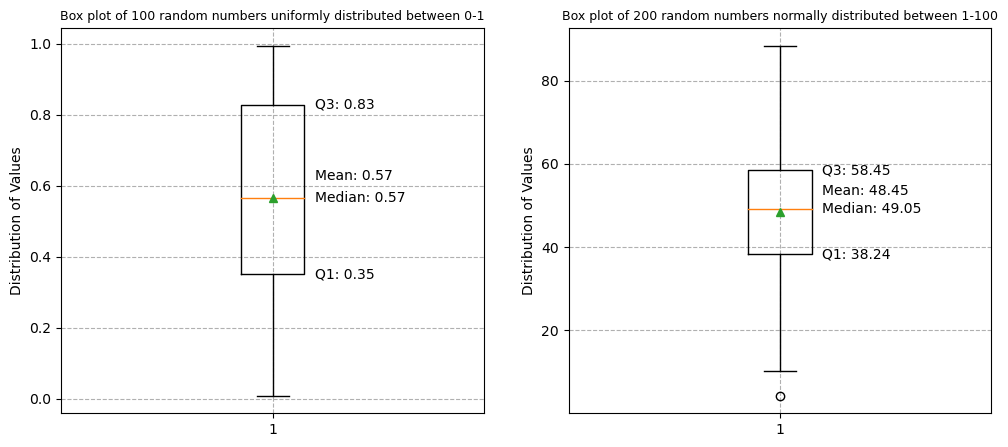

In [539]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)

# box plot
plt.boxplot(arr_uniform, showmeans=True);
plt.grid(linestyle = "--")
plt.title('Box plot of 100 random numbers uniformly distributed between 0-1', fontsize = 9)
plt.ylabel('Distribution of Values') 

median = np.median(arr_uniform)
mean = np.mean(arr_uniform)
q1 = np.percentile(arr_uniform, 25)
q3 = np.percentile(arr_uniform, 75)

plt.text(1.1, median, f'Median: {median:.2f}', verticalalignment='center')
plt.text(1.1, mean+0.06, f'Mean: {mean:.2f}', verticalalignment='center')
plt.text(1.1, q1, f'Q1: {q1:.2f}', verticalalignment='center')
plt.text(1.1, q3, f'Q3: {q3:.2f}', verticalalignment='center')
plt.subplot(1,2,2)

# box plot 
plt.boxplot(arr_normal,showmeans=True);
plt.grid(linestyle = "--")
plt.title('Box plot of 200 random numbers normally distributed between 1-100', fontsize = 9)
plt.ylabel('Distribution of Values') 
median = np.median(arr_normal)
mean = np.mean(arr_normal)
q1 = np.percentile(arr_normal, 25)
q3 = np.percentile(arr_normal, 75)

plt.text(1.1, median, f'Median: {median:.2f}', verticalalignment='center')
plt.text(1.1, mean+5, f'Mean: {mean:.2f}', verticalalignment='center')
plt.text(1.1, q1, f'Q1: {q1:.2f}', verticalalignment='center')
plt.text(1.1, q3, f'Q3: {q3:.2f}', verticalalignment='center')
plt.subplot(1,2,2)
plt.show()

<center>Fig.1 Left: Box plot of uniform distribution Right: Box plot of gaussian distribution </center>
 

#### 2. [4 pts] Partition the data into 20 bins and create a histogram of both arrays using the 20 bins with a bar chart. You may not use a histogram function from a plotting library,however, you may use a bar chart function.

#### Answer: Partitioned the data into 20 bins and created bar graph for both the arrays using 20 bins shown in fig 2. The uniform distribution of bar graph shows roughly similar frequencies between the entire range 0-1. However, the bar graph of Gaussian distribution follows a bell shape where the frequency of the bins near to tne mean is higher as compred to the bins away from mean. 

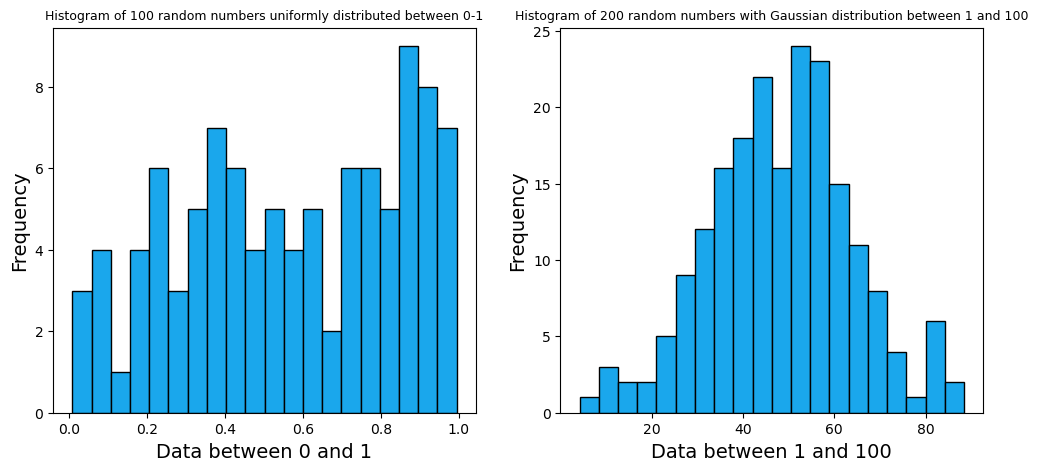

In [521]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
# create bins 
hist, bins = np.histogram(arr_uniform, bins=20)
plt.bar(bins[0:-1], hist, width=bins[1]-bins[0], edgecolor='black', align='edge',color= "#1AA7EC")
plt.title('Histogram of 100 random numbers uniformly distributed between 0-1', fontsize = 9)
plt.xlabel('Data between 0 and 1', fontsize = 14)
plt.ylabel('Frequency',fontsize = 14)

plt.subplot(1,2,2)
# create bins 
hist, bins = np.histogram(arr_normal, bins=20)
plt.bar(bins[0:-1],hist, width=bins[1]-bins[0], edgecolor='black', align='edge',color= "#1AA7EC")
plt.title('Histogram of 200 random numbers with Gaussian distribution between 1 and 100',fontsize = 9)
plt.xlabel('Data between 1 and 100',fontsize = 14)
plt.ylabel('Frequency',fontsize = 14)
plt.show()

<center>Fig.2 Left: Bar graph of uniform distribution with 20 bins Right: Bar graph of gaussian distribution with 20 bins </center>

#### 3. [6 pts] Write the arrays into a binary file. Read it back into an array. Visualize the arrays that were read in by plotting the cumulative distribution function as a line graph.

#### Answer: Wrote both the arrays in two different bin files and read the arrays back from the files. Fig 3. represetns the cumulative distribution plot where the y axis represents the probabilty 0-1 and x axis represnt the data. The CDF curve is linear for uniform distribution shows equal probability of the data. The CDF of gaussian distribution is a s shaped curve represents high probabibilty near mean. 

Text(0, 0.5, 'Probability')

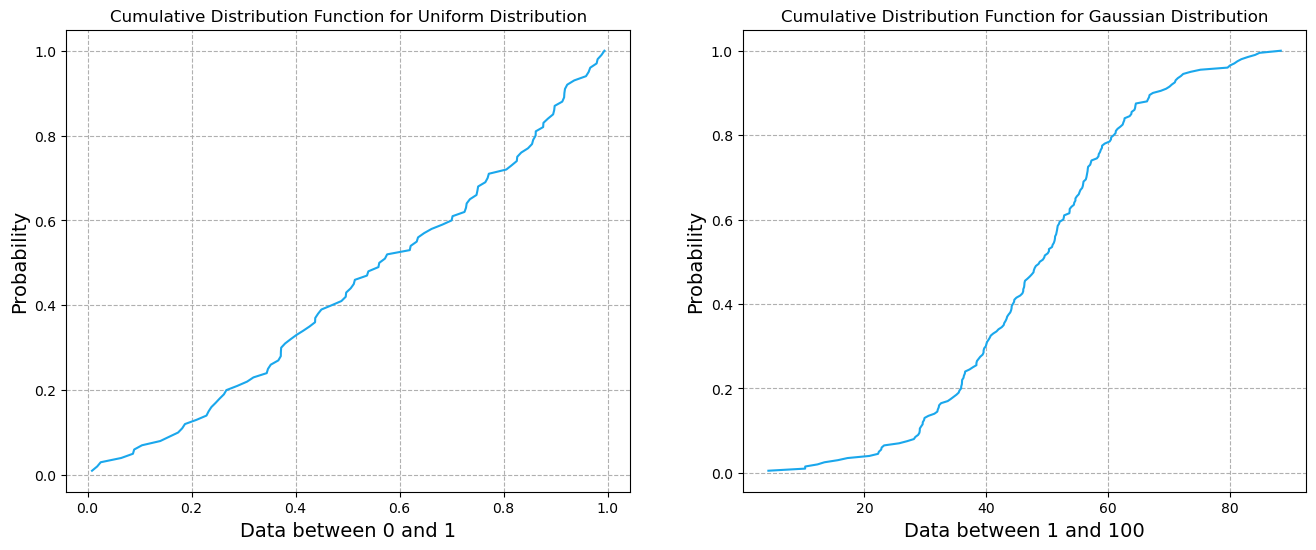

In [538]:
file_path = 'uniform.bin'
## save the unifrom array into binary file
with open(file_path,'wb') as file:
    np.save(file,arr_uniform) 

## read from the file
with open(file_path,'rb') as file:
    arr_uniform_file = np.load(file)

file_path = 'normal.bin'

## save the gaussian array into binary file
with open(file_path,'wb') as file:
    np.save(file,arr_normal) 

## read from the file    
with open(file_path,'rb') as file:
    arr_normal_file = np.load(file)

# Sort the array
arr_uniform_sort = np.sort(arr_uniform_file)

# cumulative probabilities
cdf = np.arange(1, len(arr_uniform_sort) + 1) / len(arr_uniform_sort)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(arr_uniform_sort, cdf, c= "#1AA7EC")
plt.grid(linestyle = '--')
plt.title('Cumulative Distribution Function for Uniform Distribution')
plt.xlabel('Data between 0 and 1', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)

# Sort the array
arr_normal_sort = np.sort(arr_normal_file)

# cumulative probabilities
cdf = np.arange(1, len(arr_normal_sort) + 1) / len(arr_normal_sort)

plt.subplot(1,2,2)
# Plotting the CDF
plt.plot(arr_normal_sort, cdf,c= "#1AA7EC")
plt.grid(linestyle = '--')
plt.title('Cumulative Distribution Function for Gaussian Distribution')
plt.xlabel('Data between 1 and 100', fontsize = 14)
plt.ylabel('Probability', fontsize = 14)

<center>Fig.3 Left: CDF of uniform distribution  Right: CDF of gaussian distribution  </center>

#### 4. [4 pts] Create 2D arrays using uniform random sampling and gaussian random sampling with 5,000 points on [0,1] x [0,1]. Plot the arrays with a scatter plot and com-pare. Note: You can use Python’s built in random.sample package.

#### Answer Created 2D arrays using uniform random sampling and gaussian random sampling with 5,000 points on [0,1] x [0,1]. Fig 4 shows scatter plot of 5000 x 5000 points from both the distribution. It can be referred the data points are quite concentrated near to the centre [0.5, 0.5] in case of gaussian sampling and data  points are quite spread out in the entire range of [0,1] in case of uniform sampling.  

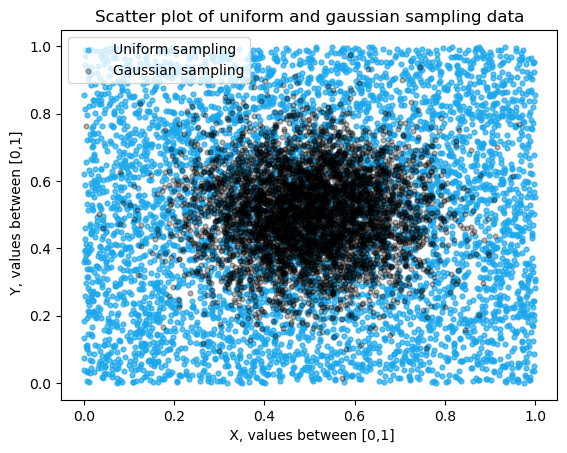

In [530]:
np.random.seed(31)
arr_uniform_2d = np.random.sample((2,5000))
plt.scatter(arr_uniform_2d[0],arr_uniform_2d[1], s = 12, c= "#1AA7EC", alpha = 0.7, label = "Uniform sampling")

arr_normal_2d = np.random.normal(0.5,0.13,(2,5000))

plt.scatter(arr_normal_2d[0],arr_normal_2d[1], c = 'black', s = 12, alpha = 0.3, label = "Gaussian sampling")
plt.xlabel(" X, values between [0,1]")
plt.ylabel(" Y, values between [0,1]")
plt.legend()
plt.title('Scatter plot of uniform and gaussian sampling data')
plt.show()

Fig.4 Scatter Plot of uniform and gaussian sampling data 

#### 4b. [8 pts] For both sampling arrays, generate 100 bins along both dimensions(think of counting the number of points in each grid cell). The output will be a 2D array of size 100x100. Show these arrays as images.

#### Answer: Fig 5 represnts 2D histogram of uniform and gaussian sampling. The bins frequecies are spread out in uniform sampling and frequencies are concentrated near to mean in gaussian sampling. 

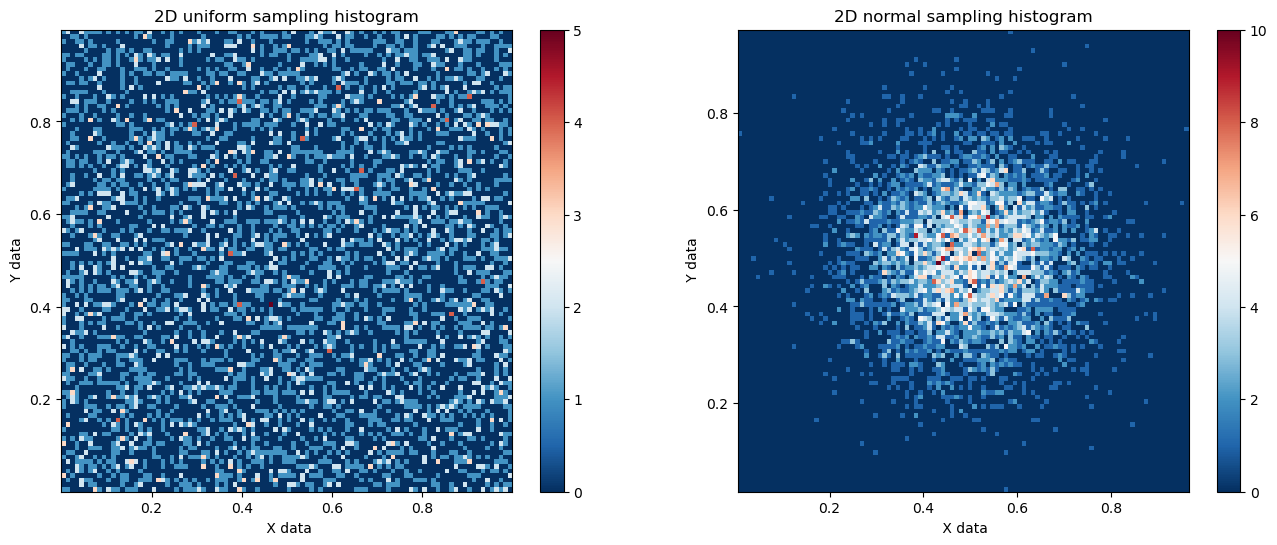

In [531]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
hist,xbins, ybins, image = plt.hist2d(arr_uniform_2d[0], arr_uniform_2d[1], bins=100, cmap = 'RdBu_r')
plt.colorbar()
plt.xlabel(" X data")
plt.ylabel(" Y data")
plt.title('2D uniform sampling histogram')

plt.subplot(1,2,2)
hist,xbins, ybins, image = plt.hist2d(arr_normal_2d[0], arr_normal_2d[1], bins=100,cmap = 'RdBu_r')
plt.colorbar()
plt.xlabel(" X data")
plt.ylabel(" Y data")
plt.title('2D normal sampling histogram')
plt.show()

<center> Fig.5 Left: 2D histogram of uniform distribution  Right: 2D histogram of gaussian distribution  </center>

#### 4c. [4 pts] Now plot both uniform and gaussian sampled arrays as contour plots with 10 levels. Hint: Use tricontourf in matplotlib as it is unstructured data.

#### Answer: Fig 6 represnts contour plot of uniform and gaussian sampling histograms. The bins having equal values are shown as contours. Mostly similar contour values observed in entire range [0,1] in uniform sampling. In gaussian distribution near the extreme ends the values are almost 0 and high at the centre. 

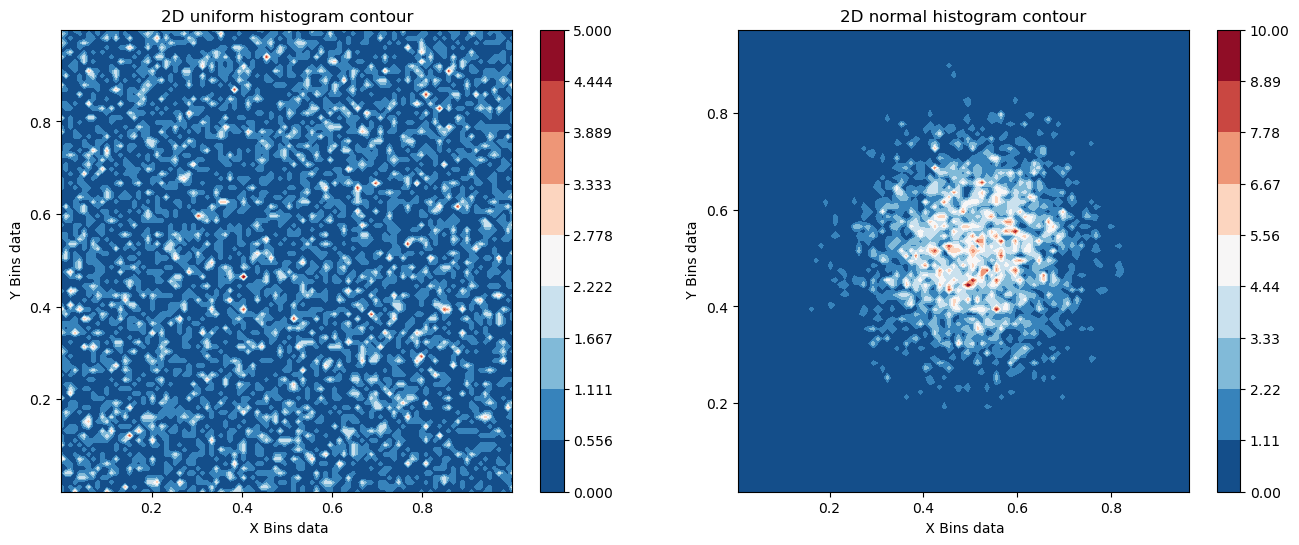

In [439]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
hist,xbins, ybins, image = plt.hist2d(arr_uniform_2d[0], arr_uniform_2d[1], bins=100, cmap = 'RdBu_r')
plt.contourf(hist, extent = [0,1,0,1], levels = np.linspace(hist.min(),hist.max(),10), cmap = 'RdBu_r')
plt.colorbar()
plt.xlabel(" X Bins data")
plt.ylabel(" Y Bins data")
plt.title('2D uniform histogram contour')

plt.subplot(1,2,2)
hist,xbins, ybins, image = plt.hist2d(arr_normal_2d[0], arr_normal_2d[1], bins=100,cmap = 'RdBu_r')
plt.contourf(hist, extent = [0,1,0,1], levels = np.linspace(hist.min(),hist.max(),10), cmap = 'RdBu_r')
plt.colorbar()
plt.xlabel(" X Bins data")
plt.ylabel(" Y Bins data")
plt.title('2D normal histogram contour')
plt.show()

<center> Fig 6 represnts contour plot of uniform and gaussian sampling histograms </center>

### Part 2: Intersting data sets for visualization [20 points]

#### 1. [5 pts] Download the NOAA Land Ocean Temperature Anomalies Data Set: https://my.eng.utah.edu/~cs6635/NOAA-Temperatures.csv. Create a bar plot of the data. Include a label called “Year” along the x-axis and a label called Degrees F +/- From Average along the y-axis. Color each bar with either red/blue based on whether there is a positive/negative change in temperature. Describe trends in the data.

#### Answer: Figure 7 represents the temperature anomalies from the year 1880 to 2017 as per NOOA data set. It can be seen that from 1880 to till around 1939 the temprature difference is negative and beyond 1940 the trends are towards positive temperature difference. There are few years between 1945 to 1975 which shows a negative temperature difference. From the year 1975 to 2017 it shows increase in tempreature i.e getting hotter as the year passes. In the year 2016 it reaches a maximum value of 0.9. 

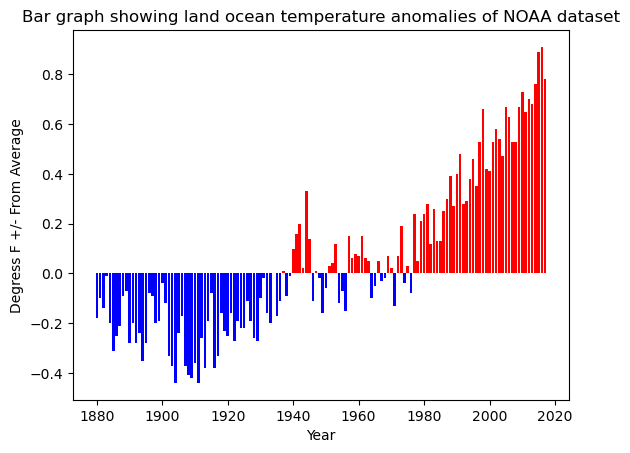

In [449]:
# download the data from the given URL
df = pd.read_csv('https://my.eng.utah.edu/~cs6635/NOAA-Temperatures.csv',header=4)
# bar graph 
plt.bar(np.asarray(df['Year'],int),df['Value'], color = ['blue' if f<0 else 'red'for f in df['Value']])
plt.xlabel('Year')
plt.ylabel('Degress F +/- From Average')
plt.title('Bar graph showing land ocean temperature anomalies of NOAA dataset')
plt.show()

<left> Figure 7 represents the temperature anomalies from the year 1880 to 2020 as per NOOA data set </left>

#### 2. [5 pts] Download the dataset https://my.eng.utah.edu/~cs6635/Breakfast-Cereals.xls and generate a radar/star chart with 8 nutritional statistics for 3 cereals.

#### Answer: I have choosen Apple Cinnamon Cherrios, Basic 4 and Cherrios as three different Cereals and the 8 nutritional categories as 'Calories', 'Protein', 'Fat', 'Fiber', 'Carbohydrates', 'Sugars', 'Vitamins', 'Potassium'. The figure 8 shows the differnet nutritional values of 3 cereals. It can be inferred that Bsic 4 has higher value of calories and almost similar value of potassium when comapred with cherrios. There are quite overlapping areas observed in this plot which makes difficult to infer all the information form this radar plot. For example the information of Apple Cinnamon Cherrios is completely hidden. 

In [465]:
# read the nuitrition dataset
data_nutrition = pd.read_excel('Breakfast-Cereals.xls')

## select the required columsn
data_cereal = data_nutrition[['Cereal', 'Calories', 'Protein', 'Fat', 'Fiber', 'Carbohydrates',
       'Sugars', 'Vitamins', 'Potassium']]

## select  3 cereals 
selected_cereals = data_cereal.head(3)  

## define the categories 
columns_for_radar = ['Calories', 'Protein', 'Fat', 'Fiber', 'Carbohydrates',
       'Sugars', 'Vitamins', 'Potassium']

## defining the data for the radar plot for each cereal r and theta
data_for_radar = []

for i, row in selected_cereals.iterrows():
    trace = go.Scatterpolar(
        r =row[columns_for_radar].values,
        theta=columns_for_radar,
        fill='toself',
        name=row['Cereal']
    )
    data_for_radar.append(trace)

layout = go.Layout(
    title='Nutritional Comparison of 3 different Breakfast Cereals',
    showlegend=True,
    
)
fig = go.Figure(data=data_for_radar, layout=layout)
fig.show()

<center> Fig 8. Radar plot of  3 cereals having differnet nutritional values. </center>

#### [10 pts] Five Thirty Eight maintains a sever with many interesting datasets: https://github.com/fivethirtyeight/data. Choose two different data sets to visualize. Visu- alize each data set using what you think is the most appropriate plot for the given data. Choose between Parallel Coordinates and Scatter Plot for each data set and use each plotting type only once. It is also helpful to color lines or points according to certain features in the data set to get more insight. Describe the trends you can find in the data by experimenting with these plots.

#### Answer. The Dataset I choose is the "early senate polls". "https://github.com/fivethirtyeight/data/blob/master/early-senate-polls/early-senate-polls.csv". The dataset has year, election_result, presidential_approval and poll_average. I represented the data in a scatter plot between election result and poll average with the colormap represents the year varying from 2006 to 2012. I convert the presidential approval as categorical variable to represent this information as scatter plot markers shape i.e if presidential approval is > 30 % then the marker shape is "o" otherwise "x". In this way, i could able to represent the entire dataset in a single scatter plot. From the figure it can be seen that there exists a linear relatioship between election result and poll average irrespective of years. If the poll average shows -ve margin the election result also follows the negative margin and vice versa. In most of the cases the presidential approval is > 30%. Only is one case in the year 2008, the presidential average is below 30% but the election result and poll average shows positive margin. In rest of the cases if the presidential average is below 30% then the poll average and election result have -ve margin. 

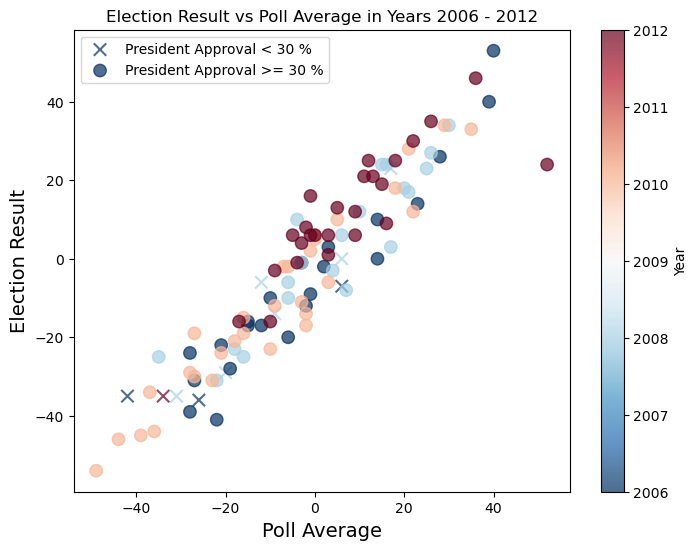

In [486]:
data_poll = pd.read_csv('early-senate-polls.csv')
data_poll['presidential_approval'].describe()
data_poll['cat_Pa'] = ["o" if p < 30 else "x" for p in data_poll['presidential_approval']]

subset_o = data_poll[data_poll['cat_Pa'] == "o"]
subset_x = data_poll[data_poll['cat_Pa'] == "x"]

plt.figure(figsize=(8, 6))


plt.scatter(subset_o['poll_average'], subset_o['election_result'], 
            c=subset_o['year'], marker='x', alpha=0.7, s = 80,label='President Approval < 30 %', cmap='RdBu_r')
plt.scatter(subset_x['poll_average'], subset_x['election_result'], 
            c=subset_x['year'], marker='o', alpha=0.7, s = 80,label='President Approval >= 30 %', cmap = 'RdBu_r')

plt.colorbar(label='Year')
plt.title('Election Result vs Poll Average in Years 2006 - 2012')
plt.xlabel('Poll Average', fontsize=14)
plt.ylabel('Election Result', fontsize=14)
plt.legend()
plt.show()

<center> Fig 9. Scatter plot of  early senate polls </center>

#### Answer. The Dataset I choose is the divorce data set."https://github.com/fivethirtyeight/data/blob/master/marriage/divorce.csv"". The dataset has 18 different demographic categories and their corresponding divorce values from the year 1960 to till 2012. I used the paralled coordinate plot to represent this data, where each verical bar shows the demography categores and the line repreents the divorce values for each categoired for each year. It can be seen that the divroce values is quite high around 0.4 for the catgory poor_4554 i.e poor in the age range of 45-54. Similarly poor in the age range of 35-44 the divorce value is around 0.35. Lowest divorce value around 0.05 has been observed for the rich in the age range of 35-44 and rich in the age range of 45-54. Furthermore as year passes by the divorce value also increses. Year 1960 shows lowest divorce values followed by 1970 and 1980.

##### Dataset "https://github.com/fivethirtyeight/data/blob/master/marriage/divorce.csv"

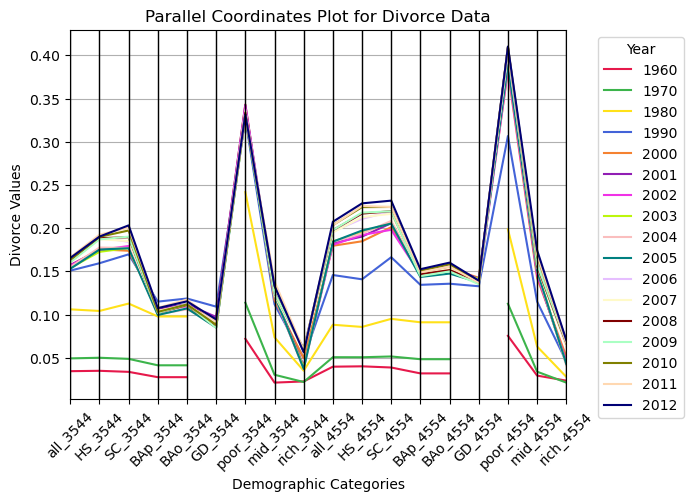

In [493]:
data_divorce = pd.read_csv('divorce.csv')
data_divorce = data_divorce.drop(['Unnamed: 0', 'date'], axis=1)
color_list = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', 
              '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', 
              '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', 
              '#aaffc3', '#808000', '#ffd8b1', '#000075'
            ]

parallel_coordinates(data_divorce, class_column='year', colormap=ListedColormap(color_list ))

plt.title('Parallel Coordinates Plot for Divorce Data')
plt.xlabel('Demographic Categories')
plt.ylabel('Divorce Values')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Part 3: Questions on The Value of Visualization Paper [20 pts]
(https://my.eng.utah.edu/~cs6635/Value-of-Visualization.pdf)


#### "The Value of Visualization" by Jarke J.Van Wijk 
#### 1 [5 pts] Why is assessing value of visualizations important? What are the two measures for deciding the value of visualizations?

Assesing the the value of visualizations is important because it helps to evaluate how efficiently and effectively visulization guides in decision making, understanding and representing information. Two key measures which decides the value of visualizations are effectivness and efficiency. An effective visualization tool should be able to guide on decision making, providing insight into the large dataset and improves the existing knowledge of the user. Efficiency is related to the usage of resources such as time, effort and hardware while developing an efficient visualization tool should use less resources.


#### 2 [5 pts] Briefly describe a mathematical model for the visualization block shown in Fig. 1.
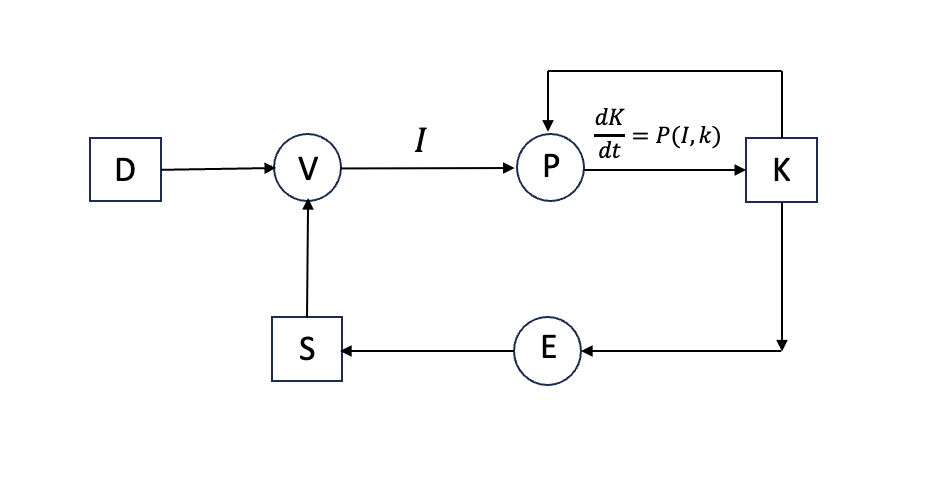


Figure 1 of the paper represents the general workflow how visualization works. In the figure the visualization function V transforms the input data D into time varying image I(t) guided by certain specification S. This specification S represents the specification of hardware, algorithm and specific parameters. The output I can be an image/animation/ auditory or haptic feedback. This output is perceived by the user resulting in increase in knowledge K, which is evaluate as rate of change of knowledge with time. This rate of change depends on the current knowledge of the user, the cognitive and perceptual abiltiy of the user and the characteristic of the output image. Furthermore, the user adapts the specifications based on the updated knowledge and explores the data further. This represents an interactive way of learning and understanding the data through visualiztion. 


#### 3 [5 pts] State four parameters that describe the costs associated with any visualization technique.
There are four differnet cost that describe the total costs associated with any visualization technique. 

1. Initial development cost : Cost associated with developement and implementation of the visualtion technique for example hardware cost. 
2. Initial cost per user : Time spend by user to select and acquire of Visualization technique and understanding its usage and changing it as per requirement.

3. Initial cost per session : Data conversion cost. 

4. Perception and exploration cost: User time in understanng the visualization and exploring the data. 

Number of users (n), how many times (m) each user visualize the data, how many exploration steps (k) in each session and time T also affects the total cost. For a great visualization tool n,m should be on higher side i.e number of users using the visualization tool frequently with lower value of exploration (k) and time (T). 




##### 4 [5 pts] What are the pros and cons of interactivity of visualizations?##

Pros:  
      1. Enhances the understanding of the data  
      2. Exploration of the data and get improved insights  
      3. Developing need basis interactive tool to understand the data better   

Cons:  
     1. Freely modifying the visualization results into subjectivity user can modify the visualization to emphasize the result he/she wants to show.  
     2. Difficulty in comparison when higher level of customization is done in visualization.  
     3. Higher cost because of the interaction.  

#### PART 4: 3D Scalar Volume Dataset
#### MATLAB/Python also can be used for analysis and visualization of 3D volume data sets, such as brain MRI images. Download the brain MRI data set from https://my.eng.utah.edu/~cs6635/T2.nii.gz . The data format is .nii with 320 x 320 x 256 dimensions. Load data in MATLAB/Python. Extract one slice for each axis (three slices total) from the volume and save them as images. Use at least two colormaps to show the three im- age set and describe the difference this choice makes.

#### Answer: I took 3 different slices from 3 different axis. I have used two different color map "hot" and "gray" to represent the data. The magma colormap shows a clear gradient of colors depending on the values. Higher values have yellowish color with 0 values have black color. In case of gray color map its the gradient form black to gray with higher values have gray color. I can see the differnce in both the colormap however the hot colormap is very prominent and distictive.

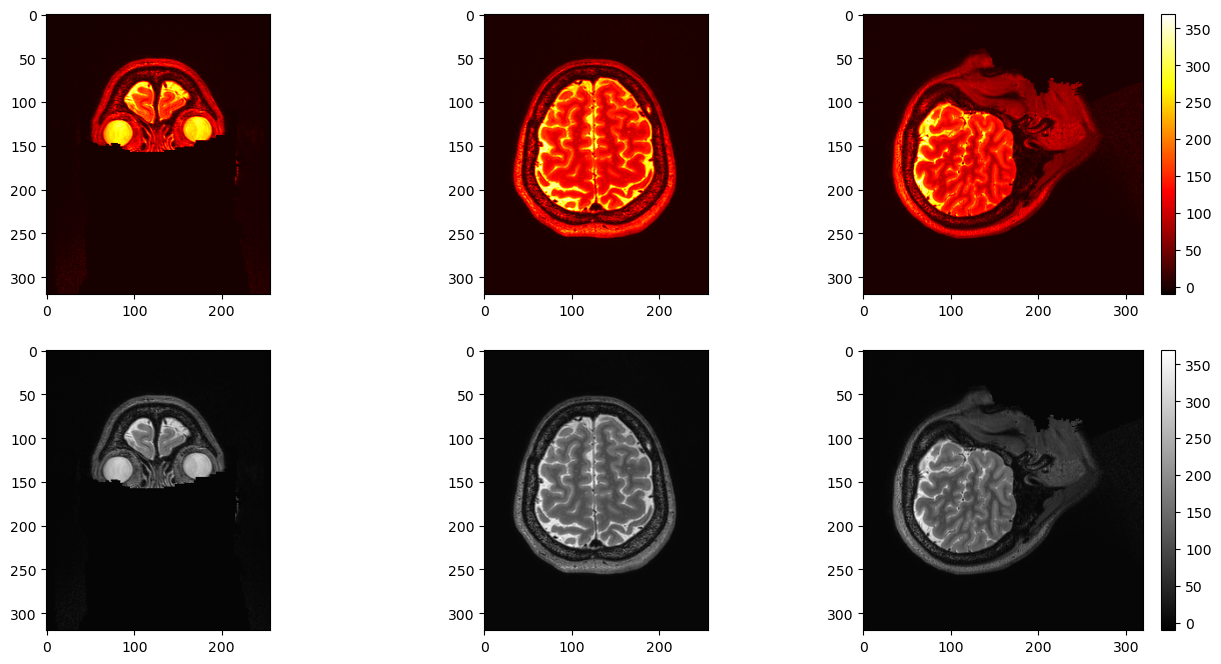

In [537]:
import nibabel as nib
mri = nib.load("T2.nii")
mri.shape
plt.figure(figsize=(16,8))
mri_data = mri.get_fdata()
plt.subplot(2,3,1)
plt.imshow(mri_data[56,:,:],cmap='hot')
## save image 
plt.savefig('x_mri.jpg',format='jpg')
plt.subplot(2,3,2)
plt.imshow(mri_data[:,56,:],cmap='hot')
# save image
plt.savefig('y_mri.jpg',format='jpg')
plt.subplot(2,3,3)
plt.imshow(mri_data[:,:,56],cmap='hot')
# save image
plt.savefig('z_mri.jpg',format='jpg')
plt.colorbar()
plt.subplot(2,3,4)
plt.imshow(mri_data[56,:,:],cmap='gray')
plt.subplot(2,3,5)
plt.imshow(mri_data[:,56,:],cmap='gray')
plt.subplot(2,3,6)
plt.imshow(mri_data[:,:,56],cmap='gray')
plt.colorbar()

References: 
1. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html
2. https://sashamaps.net/docs/resources/20-colors/
3. https://nipy.org/nibabel/
4. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html
